In [65]:
# 기본 제공 라이브러리 pandas, numpy, openpyxl, pyarrow, geopandas, matplotlib, tqdm
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [66]:
# 실제 환경에서 유동인구: r"C:\Users\User\anaconda_projects\data\fpop_2023MM.csv", 카드매출: r"C:\Users\User\anaconda_projects\data\card_2023MM.csv"
df = pd.read_csv("data/2324_카드매출_샘플/202412_카드매출_샘플.csv")
print(df.shape)
df

(3079, 27)


,GID,CUSTOMER_CLASS,CUSTOMER_ADDR,A10,A20,A30,A40,A50,A60,X,...,WD_X,WD_TOTAL,HD_A10,HD_A20,HD_A30,HD_A40,HD_A50,HD_A60,HD_X,HD_TOTAL
0,다사611484,내국인,관내,81.8882,96.0514,45.9538,6.5773,69.8870,58.5699,0.0000,...,0.0000,344.9858,71.2057,49.4392,57.7084,6.8726,42.2048,65.3222,0.0000,292.7529
1,다사611484,내국인,관외,1.9346,73.0934,28.1348,23.1567,42.4751,30.3218,0.0000,...,0.0000,201.0750,1.1254,41.5725,36.0584,11.9290,23.3420,17.5614,0.0000,131.5887
2,다사611484,법인,X,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,166.9328,...,110.3230,110.3230,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,143.4535,143.4535
3,다사611484,외국인,X,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,50.9674,...,37.4707,37.4707,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.3310,14.3310
4,다사611485,내국인,관내,39.5929,15.7102,25.9237,32.6128,82.0469,33.5716,0.0000,...,0.0000,233.2421,46.9157,9.3299,16.7294,43.4560,97.7663,34.3584,0.0000,248.5557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,다사655507,외국인,X,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,83.3194,...,0.0686,0.0686,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,76.3471,76.3471
3075,다사656507,내국인,관내,29.4222,93.9028,85.0322,92.5202,23.1046,54.9443,0.0000,...,0.0000,334.9584,38.2063,80.3075,104.1932,93.8844,24.2388,44.6378,0.0000,385.4680
3076,다사656507,내국인,관외,31.9814,14.6902,7.9885,2.2831,57.8217,12.4575,0.0000,...,0.0000,120.5020,39.6024,8.2489,8.6992,1.2981,72.1957,16.5459,0.0000,146.5902
3077,다사656507,법인,X,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.9487,...,46.7046,46.7046,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,74.5133,74.5133


In [67]:
df.columns

Index(['GID', 'CUSTOMER_CLASS', 'CUSTOMER_ADDR', 'A10', 'A20', 'A30', 'A40',
       'A50', 'A60', 'X', 'TOTAL', 'WD_A10', 'WD_A20', 'WD_A30', 'WD_A40',
       'WD_A50', 'WD_A60', 'WD_X', 'WD_TOTAL', 'HD_A10', 'HD_A20', 'HD_A30',
       'HD_A40', 'HD_A50', 'HD_A60', 'HD_X', 'HD_TOTAL'],
      dtype='object')

In [68]:
df2 = df[(df["CUSTOMER_CLASS"] == "외국인")]
df2

,GID,CUSTOMER_CLASS,CUSTOMER_ADDR,A10,A20,A30,A40,A50,A60,X,...,WD_X,WD_TOTAL,HD_A10,HD_A20,HD_A30,HD_A40,HD_A50,HD_A60,HD_X,HD_TOTAL
3,다사611484,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,50.9674,...,37.4707,37.4707,0.0,0.0,0.0,0.0,0.0,0.0,14.3310,14.3310
6,다사611485,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,7.1275,...,17.7243,17.7243,0.0,0.0,0.0,0.0,0.0,0.0,13.3791,13.3791
12,다사612484,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,175.9599,...,138.9816,138.9816,0.0,0.0,0.0,0.0,0.0,0.0,1.7561,1.7561
16,다사612485,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,40.6341,...,40.2748,40.2748,0.0,0.0,0.0,0.0,0.0,0.0,4.7537,4.7537
20,다사612486,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,55.8710,...,35.2632,35.2632,0.0,0.0,0.0,0.0,0.0,0.0,25.8407,25.8407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,다사654501,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,34.8822,...,89.5717,89.5717,0.0,0.0,0.0,0.0,0.0,0.0,9.5586,9.5586
3060,다사654502,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,69.1253,...,32.4905,32.4905,0.0,0.0,0.0,0.0,0.0,0.0,90.1365,90.1365
3064,다사655501,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,40.9983,...,68.8838,68.8838,0.0,0.0,0.0,0.0,0.0,0.0,63.3439,63.3439
3074,다사655507,외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,83.3194,...,0.0686,0.0686,0.0,0.0,0.0,0.0,0.0,0.0,76.3471,76.3471


In [69]:
# 실제 환경에서 격자 r"C:\Users\User\anaconda_projects\shp\100m격자.shp"
shp_path = "data/shp/100m격자.shp"
gdf = gpd.read_file(shp_path)
gdf.rename(columns={"gid": "GID"}, inplace=True)
gdf

,GID,geometry
0,다사628508,"POLYGON ((962800 1950800, 962800 1950900, 9629..."
1,다사636494,"POLYGON ((963600 1949400, 963600 1949500, 9637..."
2,다사622510,"POLYGON ((962200 1951000, 962200 1951100, 9623..."
3,다사622494,"POLYGON ((962200 1949400, 962200 1949500, 9623..."
4,다사630485,"POLYGON ((963000 1948500, 963000 1948600, 9631..."
...,...,...
1807,다사636487,"POLYGON ((963600 1948700, 963600 1948800, 9637..."
1808,다사644526,"POLYGON ((964400 1952600, 964400 1952700, 9645..."
1809,다사624501,"POLYGON ((962400 1950100, 962400 1950200, 9625..."
1810,다사613479,"POLYGON ((961300 1947900, 961300 1948000, 9614..."


In [70]:
shp_path3 = r"data\shp\N3A_G0110000.shp"
gdf3 = gpd.read_file(shp_path3)
gdf3

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,100037705074G01110100000000000215,1121510100,중곡동,HJD010,G0018117,R23120215,"POLYGON ((964868.173 1951169.287, 964863.357 1..."
1,100037705074G01110100000000000216,1121510200,능동,HJD010,G0018117,R23120216,"POLYGON ((963739.001 1950413.676, 963718.401 1..."
2,100037705084G01110100000000000217,1121510300,구의동,HJD010,G0018117,R23120217,"POLYGON ((965106.925 1950858.311, 965092.671 1..."
3,100037705085G01110100000000000218,1121510400,광장동,HJD010,G0018117,R23120218,"POLYGON ((964839.847 1948644.596, 964703.355 1..."
4,100037705083G01110100000000000219,1121510500,자양동,HJD010,G0018117,R23120219,"POLYGON ((963107.89 1949210.737, 963108.983 19..."
5,100037705083G01110100000000000220,1121510700,화양동,HJD010,G0018117,R23120220,"POLYGON ((962412.351 1949832.458, 962415.476 1..."
6,100037705073G01110100000000000221,1121510900,군자동,HJD010,G0018117,R23120221,"POLYGON ((962858.897 1950952.364, 962856.23 19..."


In [71]:
gdf_card = gdf.merge(df2, on="GID", how="right")
print(gdf_card.shape)
gdf_card.head()

(612, 28)


,GID,geometry,CUSTOMER_CLASS,CUSTOMER_ADDR,A10,A20,A30,A40,A50,A60,...,WD_X,WD_TOTAL,HD_A10,HD_A20,HD_A30,HD_A40,HD_A50,HD_A60,HD_X,HD_TOTAL
0,다사611484,"POLYGON ((961100 1948400, 961100 1948500, 9612...",외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,...,37.4707,37.4707,0.0,0.0,0.0,0.0,0.0,0.0,14.3310,14.3310
1,다사611485,"POLYGON ((961100 1948500, 961100 1948600, 9612...",외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,...,17.7243,17.7243,0.0,0.0,0.0,0.0,0.0,0.0,13.3791,13.3791
2,다사612484,"POLYGON ((961200 1948400, 961200 1948500, 9613...",외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,...,138.9816,138.9816,0.0,0.0,0.0,0.0,0.0,0.0,1.7561,1.7561
3,다사612485,"POLYGON ((961200 1948500, 961200 1948600, 9613...",외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,...,40.2748,40.2748,0.0,0.0,0.0,0.0,0.0,0.0,4.7537,4.7537
4,다사612486,"POLYGON ((961200 1948600, 961200 1948700, 9613...",외국인,X,0.0,0.0,0.0,0.0,0.0,0.0,...,35.2632,35.2632,0.0,0.0,0.0,0.0,0.0,0.0,25.8407,25.8407


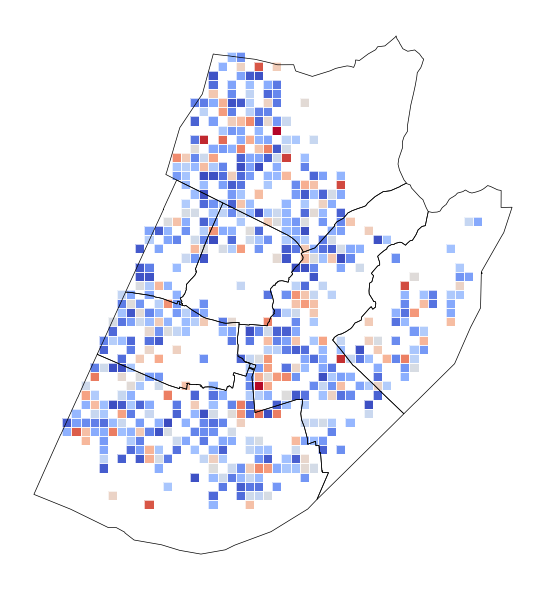

In [72]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
gdf_card.boundary.plot(ax=ax, color="white", linewidth=0.5)

# 동 경계
gdf3.boundary.plot(ax=ax, color="black", linewidth=0.5)

# 관심 컬럼을 지정
gdf_card.plot(column="TOTAL", cmap="coolwarm", ax=ax)
# gdf_card.plot(column="TOTAL", cmap="coolwarm_r", ax=ax)
plt.tight_layout()
# plt.savefig("test_card_foreign.png", dpi=600, transparent=True)
plt.show()

In [73]:
# Tukey

q1 = gdf_card["TOTAL"].quantile(0.25)
q3 = gdf_card["TOTAL"].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

gdf_card2 = gdf_card[(gdf_card["TOTAL"] >= lower_bound) & (gdf_card["TOTAL"] <= upper_bound)]
print(gdf_card.shape)
print(gdf_card2.shape)

(612, 28)
(608, 28)


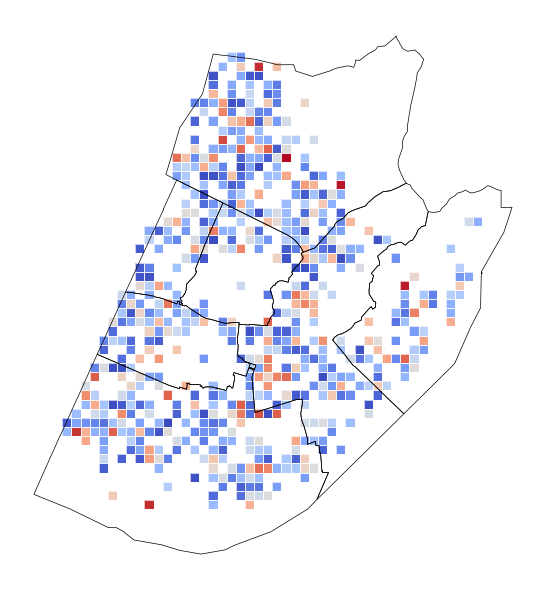

In [74]:
# Tukey 이상치 제거 후 한 번 더 그리기

fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
gdf_card2.boundary.plot(ax=ax, color="white", linewidth=0.5)

# 동 경계
gdf3.boundary.plot(ax=ax, color="black", linewidth=0.5)

# 관심 컬럼을 지정
gdf_card2.plot(column="TOTAL", cmap="coolwarm", ax=ax)
# gdf_card2.plot(column="TOTAL", cmap="coolwarm_r", ax=ax)
plt.tight_layout()
# plt.savefig("test_card_foreign.png", dpi=600, transparent=True)
plt.show()